<a href="https://colab.research.google.com/github/DanielaCaroline18/NLP/blob/main/NLP_Aula_2_Defini%C3%A7%C3%A3o_do_Corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                                                                                             sa!pip install gensim
!pip install umap-learn
!pip install wikipedia
!pip install unidecode

In [ ]:
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
import wikipedia
import string
from unidecode import unidecode
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import urllib.request
import bz2
import gensim
import warnings
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

# Definição do Corpus

## Base

In [ ]:
wikipedia.set_lang("pt")
bh = wikipedia.page("Belo Horizonte")

In [ ]:
corpus = bh.content

Selecionamos algumas frases do corpus de BH da wikipedia.

Conside a lista abaixo como nosso corpus de documentos. Cada elemento da lista, considere como um único documento.

In [ ]:
documentos = \
["Belo Horizonte é um município brasileiro e a capital do estado de Minas Gerais",
"A populacao de Belo Horizonte é estimada em 2 501 576 habitantes, conforme estimativas do Instituto Brasileiro de Geografia e Estatística",
"Belo Horizonte já foi indicada pelo Population Crisis Commitee, da ONU, como a metrópole com melhor qualidade de vida na América Latina",
"Belo Horizonte é mundialmente conhecida e exerce significativa influência nacional e até internacional, seja do ponto de vista cultural, econômico ou político",
"Belo Horizonte é a capital do segundo estado mais populoso do Brasil, Minas Gerais"]

## Preprocessamento

<b> Atividade </b>

1) Escreva uma método que realiza o pré-processamento da lista de <b>documentos</b>.

O método deve, para cada documento:
- tokenizar cada palavra
- remover stopwords
- remover números
- remover pontuções
- remover acentos

In [ ]:
def pre_processamento_texto(corpus):
    print("Documento")
    print("#tokenizacao")
    corpus_alt = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
    #lowcase
    corpus_alt = [t.lower() for t in corpus_alt]
    print("#remove stopwords")
    portugues_stops = stopwords.words('portuguese')
    corpus_alt = [t for t in corpus_alt if t not in portugues_stops]
    print("#remove numeros")
    corpus_alt = [re.sub(r'\d', '', t) for t in corpus_alt]
    print("#remove pontuação")
    corpus_alt = [t for t in corpus_alt if t not in string.punctuation]
    print("#remove acentos")
    corpus_alt = [unidecode(t) for t in corpus_alt]
   
    return corpus_alt

In [ ]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
corpus_processado = [pre_processamento_texto(documento) for documento in documentos] 

Documento
#tokenizacao
#remove stopwords
#remove numeros
#remove pontuação
#remove acentos
Documento
#tokenizacao
#remove stopwords
#remove numeros
#remove pontuação
#remove acentos
Documento
#tokenizacao
#remove stopwords
#remove numeros
#remove pontuação
#remove acentos
Documento
#tokenizacao
#remove stopwords
#remove numeros
#remove pontuação
#remove acentos
Documento
#tokenizacao
#remove stopwords
#remove numeros
#remove pontuação
#remove acentos


# Representação Textual

## N-grams

Existem várias formas de calcular os N-grams.

Iremos estudar o: Phrases do gensim e o ngrams do NLTK

### NLTK

Para retornar o ngrams do nltk, utilize o exemplo abaixo:

```python
list(ngrams(corpus, 2)
```

<b> Atividade </b>

2) Faça um código para armazena os bigrams de cada documento do corpus <b>corpus_processado</b> na variável corpus_ngrams_nltk.
Depois imprima os bigramas de cada documento

In [ ]:
corpus_processado

[['belo',
  'horizonte',
  'municipio',
  'brasileiro',
  'capital',
  'estado',
  'minas',
  'gerais'],
 ['populacao',
  'belo',
  'horizonte',
  'estimada',
  'habitantes',
  'conforme',
  'estimativas',
  'instituto',
  'brasileiro',
  'geografia',
  'estatistica'],
 ['belo',
  'horizonte',
  'indicada',
  'population',
  'crisis',
  'commitee',
  'onu',
  'metropole',
  'melhor',
  'qualidade',
  'vida',
  'america',
  'latina'],
 ['belo',
  'horizonte',
  'mundialmente',
  'conhecida',
  'exerce',
  'significativa',
  'influencia',
  'nacional',
  'internacional',
  'ponto',
  'vista',
  'cultural',
  'economico',
  'politico'],
 ['belo',
  'horizonte',
  'capital',
  'segundo',
  'estado',
  'populoso',
  'brasil',
  'minas',
  'gerais']]

In [ ]:
corpus_ngrams_nltk = [list(ngrams(doc, 2)) for doc in corpus_processado ]

In [ ]:
corpus_ngrams_nltk

[[('belo', 'horizonte'),
  ('horizonte', 'municipio'),
  ('municipio', 'brasileiro'),
  ('brasileiro', 'capital'),
  ('capital', 'estado'),
  ('estado', 'minas'),
  ('minas', 'gerais')],
 [('populacao', 'belo'),
  ('belo', 'horizonte'),
  ('horizonte', 'estimada'),
  ('estimada', 'habitantes'),
  ('habitantes', 'conforme'),
  ('conforme', 'estimativas'),
  ('estimativas', 'instituto'),
  ('instituto', 'brasileiro'),
  ('brasileiro', 'geografia'),
  ('geografia', 'estatistica')],
 [('belo', 'horizonte'),
  ('horizonte', 'indicada'),
  ('indicada', 'population'),
  ('population', 'crisis'),
  ('crisis', 'commitee'),
  ('commitee', 'onu'),
  ('onu', 'metropole'),
  ('metropole', 'melhor'),
  ('melhor', 'qualidade'),
  ('qualidade', 'vida'),
  ('vida', 'america'),
  ('america', 'latina')],
 [('belo', 'horizonte'),
  ('horizonte', 'mundialmente'),
  ('mundialmente', 'conhecida'),
  ('conhecida', 'exerce'),
  ('exerce', 'significativa'),
  ('significativa', 'influencia'),
  ('influencia', 'n

### Phrases - Gensim

Forma mais inteligente de calcular os bigrams. Ela calcula os bigramas levando em consideração a frequência do par das palavaras em todos os documentos.
Para isso ele treina um modelo e depois aplica no corpus.

```python
#treinamento bigrams
model_corpus_phrases = gensim.models.Phrases(corpus_processado, min_count=1)
#calulando os bigrams do corpus processado
bigram_corpus = model_corpus_phrases[corpus_processado]
```

<b> Atividade </b>

3) Faça um código que treine os bigrams, sendo que o <b>min_count = 1</b>. 
O <b>min_count</b> é a contagem mínima que aquele par de palavras deve aparecer junto para considerarmos com um token. Teste também com outros valores de mim_count. Depois imprima os bigramas de cada documento.
Use o corpus_processado.

In [ ]:
# treinamento bigrams
model_corpus_phrases = gensim.models.Phrases(corpus_processado, min_count=1)


In [ ]:
# calulando os bigrams do corpus processado
bigram_corpus = model_corpus_phrases[corpus_processado]

In [ ]:
corpus_processado[0]

['belo',
 'horizonte',
 'municipio',
 'brasileiro',
 'capital',
 'estado',
 'minas',
 'gerais']

In [ ]:
bigram_corpus[0]

['belo_horizonte',
 'municipio',
 'brasileiro',
 'capital',
 'estado',
 'minas_gerais']

In [ ]:
for i in range(0, len(bigram_corpus)):
  print("Doc ", i)
  print(bigram_corpus[i])

Doc  0
['belo_horizonte', 'municipio', 'brasileiro', 'capital', 'estado', 'minas_gerais']
Doc  1
['populacao', 'belo_horizonte', 'estimada', 'habitantes', 'conforme', 'estimativas', 'instituto', 'brasileiro', 'geografia', 'estatistica']
Doc  2
['belo_horizonte', 'indicada', 'population', 'crisis', 'commitee', 'onu', 'metropole', 'melhor', 'qualidade', 'vida', 'america', 'latina']
Doc  3
['belo_horizonte', 'mundialmente', 'conhecida', 'exerce', 'significativa', 'influencia', 'nacional', 'internacional', 'ponto', 'vista', 'cultural', 'economico', 'politico']
Doc  4
['belo_horizonte', 'capital', 'segundo', 'estado', 'populoso', 'brasil', 'minas_gerais']


## TD-IDF

Dica de leitura: https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XklQxnVKj7c

Para representar o texto com TF-IDF utilizamos o TfidfVectorizer. A seguir apresentamos instruções sobre como utilizá-lo.

```python
#primeiro criamos o objeto
vect = TfidfVectorizer()
vect #aqui você pode observa todos os parâmetros que o objeto possui
## Existem alguns parâmetros, opcionais, que podemos informar para uma possível melhora do nosso modelo. Por exemplo:
### inclui 1-grams e 2-grams
vect.set_params(ngram_range=(1, 2))
### ignora termos que a aparecem em mais de 50% dos documentoss
vect.set_params(max_df=0.5)
### só considero termos que aparecem em ao menos 2 documentos
vect.set_params(min_df=2)

#depois aplicamos fit_transform para transformar o texto em números
docs_tdidf = vect.fit_transform(docs)

#o docs_tdidf é uma matriz com os números que representam cada um dos textos. 
## Conseguimos verificar a dimensão desta matriz:
print(docs_tdidf.shape)

#Para visualizar as features capturadas pelo TF-IDF utilize:
print(vect.get_feature_names())
#Para visualizar os vetores correspondentes a cada palavara utilize:
df = pd.DataFrame(docs_tdidf.T.todense(), index=vect.get_feature_names(), columns=["doc"+str(i+1) for i in range(0,len(docs))])
df
```

<b> Atividade: </b>

4) Faça o TDIFTVectorizer nos documentos da variável <b>documentos</b> sem alterar nenhum parâmetro. 

In [ ]:
vect = TfidfVectorizer()
### inclui 1-grams e 2-grams
vect.set_params(ngram_range=(1, 2))
### ignora termos que a aparecem em mais de 50% dos documentoss
vect.set_params(max_df=0.5)
### só considero termos que aparecem em ao menos 2 documentos
vect.set_params(min_df=2)
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
docs_tdidf = vect.fit_transform(documentos)

<b> Atividade </b>

5) Imprima o shape do resultado da atividade 4

In [ ]:
docs_tdidf.shape

(5, 7)

<b> Atividade </b>

6) Imprima as features capturadas em 4.

In [ ]:
vect.get_feature_names()

['brasileiro',
 'capital',
 'capital do',
 'estado',
 'gerais',
 'minas',
 'minas gerais']

7) Imprima os vetores correspondentes a cada palavra de cada documento.

In [ ]:
docs_tdidf.todense()

matrix([[0.37796447, 0.37796447, 0.37796447, 0.37796447, 0.37796447,
         0.37796447, 0.37796447],
        [1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.40824829, 0.40824829, 0.40824829, 0.40824829,
         0.40824829, 0.40824829]])

<b> Atividade </b>

8) Depois repita os itens 4,5,6 e 7 aplicando a alteração de parâmetros

In [ ]:
vect = TfidfVectorizer()
### inclui 1-grams e 2-grams
vect.set_params(ngram_range=(2,3))
### ignora termos que a aparecem em mais de 50% dos documentoss
vect.set_params(max_df=0.6)
### só considero termos que aparecem em ao menos 2 documentos
vect.set_params(min_df=2)
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.6, max_features=None,
                min_df=2, ngram_range=(2, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
docs_tdidf = vect.fit_transform(documentos)

In [ ]:
docs_tdidf.shape

(5, 2)

In [ ]:
vect.get_feature_names()

['capital do', 'minas gerais']

In [ ]:
docs_tdidf.todense()

matrix([[0.70710678, 0.70710678],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.70710678, 0.70710678]])

## Bag of Words

Para representar o bag of words utilizamos o CountVectorizer

```python
#primeiro criamos o objeto
vect_bag = CountVectorizer(binary=True) #se binary = False -> ocorre a contagem da frequência em que a palavra aparece
vect_bag #imprime os parâmetros

```

<b> Atividade </b>

9) Faça o CountVectorizer nos documentos da variável <b>documentos</b> considerando binary = True

In [ ]:
# primeiro criamos o objeto
vect_bag = CountVectorizer(binary=True) #se binary = False -> ocorre a contagem da frequência em que a palavra aparece
vect_bag #imprime os parâmetros

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

<b> Atividade </b>

10) Imprima o índice correspondente a cada token da lista retornada por vect_bag.get_feature_names()

In [ ]:
docs_bow= vect_bag.fit_transform(documentos)

In [ ]:
docs_bow

<5x59 sparse matrix of type '<class 'numpy.int64'>'
	with 78 stored elements in Compressed Sparse Row format>

In [ ]:
vect_bag.get_feature_names()

['501',
 '576',
 'américa',
 'até',
 'belo',
 'brasil',
 'brasileiro',
 'capital',
 'com',
 'commitee',
 'como',
 'conforme',
 'conhecida',
 'crisis',
 'cultural',
 'da',
 'de',
 'do',
 'econômico',
 'em',
 'estado',
 'estatística',
 'estimada',
 'estimativas',
 'exerce',
 'foi',
 'geografia',
 'gerais',
 'habitantes',
 'horizonte',
 'indicada',
 'influência',
 'instituto',
 'internacional',
 'já',
 'latina',
 'mais',
 'melhor',
 'metrópole',
 'minas',
 'mundialmente',
 'município',
 'na',
 'nacional',
 'onu',
 'ou',
 'pelo',
 'político',
 'ponto',
 'populacao',
 'population',
 'populoso',
 'qualidade',
 'segundo',
 'seja',
 'significativa',
 'um',
 'vida',
 'vista']

<b> Atividade </b>

11) Observe cada palavra do primeiro documento da vairável documents (documents[0]) e o vetor retornado para este mesmo documento 
(docs_bag.todense()[0]).

Com o resultado da célula anterior, check se as posições preenchidas com '1' são as posições que representam cada uma das palavras do docs[0].
Observe que é o bag of Words que vimos em sala.

In [ ]:
docs_bow.todense()[0]

matrix([[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [ ]:
docs_bow.todense()

matrix([[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
         1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
         1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Embedding

### Utilizando um embedding treinado

<b> Atividade </b>

12) Faça download do seguinte arquivo, realize a leitura deste arquivo e carregue o modelo: 
https://drive.google.com/open?id=1zI8pGfbUHuU_0wY_FV4tD6w6ZCUJTQbh


O código abaixo é um exmplo de como ler o arquivo que você fez download.

```python
newfilepath = "embedding_wiki_100d_pt.txt"
filepath = "ptwiki_20180420_100d.txt.bz2"
with open(newfilepath, 'wb') as new_file, bz2.BZ2File(filepath, 'rb') as file:
    for data in iter(lambda : file.read(100 * 1024), b''):
        new_file.write(data)
        
#carregar
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(newfilepath, binary=False)
```

<b> Dica </b> Use %%time para capturar o tempo de execução em cada célula.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
newfilepath = "/content/drive/My Drive/embedding_wiki_100d_pt.txt"
filepath = "/content/drive/My Drive/ptwiki_20180420_100d.txt.bz2"
with open(newfilepath, 'wb') as new_file, bz2.BZ2File(filepath, 'rb') as file:
    for data in iter(lambda : file.read(100 * 1024), b''):
        new_file.write(data)

# carregar
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(newfilepath, binary=False)

In [ ]:
word_vectors.wv.vocab

In [ ]:
len(word_vectors.wv.vocab)

1055544

<b> Atividade </b>

13) Imprima os vetores das palavras "nlp" e "computacao"

```python
#exemplo de retorno do vetor
word_vectors[__]
```

In [ ]:
word_vectors["npl"]

array([ 0.6659,  0.5119, -0.0152, -0.3437,  0.3897, -0.2281, -0.3457,
       -0.369 , -0.063 ,  0.6527, -0.3391, -0.4539, -0.2778,  0.0862,
        0.4217,  0.1291,  0.3754, -0.3961,  0.1515, -0.0197, -0.1135,
       -0.1617, -0.2065, -0.0643,  0.4104, -0.0056,  0.5136, -0.0943,
        0.1373,  0.3964,  0.2894, -0.5138,  0.0154,  0.9057, -0.8594,
       -0.7475,  0.2306, -0.1922,  0.548 , -0.5278, -0.159 ,  0.2822,
       -0.4197, -0.1271,  0.0411,  0.0116,  0.2135, -0.1349, -0.2138,
        0.507 ,  0.366 ,  0.0086, -0.5621,  0.1909,  0.1788,  0.0678,
       -0.2315, -0.3827, -0.0523, -0.2665,  0.1004, -0.3617, -0.6702,
       -0.0022, -0.1074, -0.162 , -0.4893,  0.2383, -0.1643, -0.3104,
        0.0037,  0.0143,  0.0671, -0.8334, -0.0248, -0.26  , -0.1936,
       -0.0664,  0.442 ,  0.2454, -0.0658, -0.1363, -0.3748, -0.2374,
       -0.259 ,  0.3742,  0.3004, -0.5761, -0.0758,  0.0276,  0.1911,
        0.0914, -0.0872, -0.0447,  0.2659, -0.3028, -0.3364, -0.3497,
        0.3734,  0.1

In [ ]:
word_vectors["computacao"]

array([ 0.5076, -0.2598,  0.0993,  0.1021, -0.2076, -0.2745,  0.0104,
        0.0107,  0.0151,  0.2485, -0.2933,  0.1184, -0.4087, -0.0381,
        0.0528, -0.2312,  0.1387,  0.1144,  0.0291,  0.164 , -0.0941,
        0.1045, -0.1874,  0.0116,  0.1133, -0.11  , -0.0607,  0.047 ,
       -0.0259,  0.4073,  0.1337, -0.3197,  0.0559,  0.2985, -0.0571,
       -0.2967,  0.0675,  0.1016,  0.4049, -0.347 ,  0.1782, -0.2004,
       -0.1565, -0.0758,  0.3695,  0.0918, -0.0197, -0.4832, -0.5214,
        0.124 ,  0.3514,  0.1103,  0.0646, -0.0722,  0.2532, -0.0997,
       -0.0581, -0.0238, -0.164 , -0.0828,  0.5997, -0.1605,  0.0169,
        0.3451,  0.3026, -0.0841, -0.1699,  0.2674,  0.0184, -0.1471,
       -0.218 , -0.0565, -0.1998, -0.3754, -0.1754,  0.1689, -0.2062,
        0.2613,  0.1208, -0.217 ,  0.1932, -0.3372, -0.119 , -0.1323,
       -0.4022,  0.0883,  0.1728, -0.2999, -0.0619,  0.3041,  0.1596,
       -0.2037,  0.1473, -0.0561,  0.1435, -0.0683, -0.2464, -0.0562,
        0.0109,  0.0

<b> Similaridade de Vetores </b> 

No gensim é possível realizar a similaridade utilizando o seguinte método:

```python
word_vectors.most_similar(___)
```

<b> Atividade </b>

14) Verifique a similaridade das seguintes palavras: elizabete, raiva, segunda, dois, computação.

In [ ]:
word_vectors.most_similar("maria")

[('teresa', 0.9112114906311035),
 ('ana', 0.882124125957489),
 ('francisca', 0.8719291687011719),
 ('amélia', 0.8676352500915527),
 ('isabel', 0.861691951751709),
 ('cristina', 0.8612221479415894),
 ('benedita', 0.8503609895706177),
 ('ignácia', 0.8415696620941162),
 ('possidônia', 0.8404463529586792),
 ('luísa', 0.8373240232467651)]

In [ ]:
word_vectors.most_similar("sonia")

[('nina', 0.8018407821655273),
 ('adriana', 0.7894359827041626),
 ('patricia', 0.7888399362564087),
 ('sandra', 0.7887262105941772),
 ('cynthia', 0.7850594520568848),
 ('raquel', 0.78312748670578),
 ('tania', 0.7758930921554565),
 ('sheila', 0.7755793929100037),
 ('natalia', 0.7728093266487122),
 ('silvia', 0.7710472941398621)]

In [ ]:
word_vectors.most_similar("raiva")

[('medo', 0.8303433656692505),
 ('frustração', 0.8079831600189209),
 ('desespero', 0.8039345741271973),
 ('tristeza', 0.800615668296814),
 ('remorso', 0.7922823429107666),
 ('desgosto', 0.7901228666305542),
 ('inveja', 0.781806468963623),
 ('ciúmes', 0.7798185348510742),
 ('ódio', 0.776374101638794),
 ('repugnância', 0.7657582759857178)]

In [ ]:
word_vectors.most_similar("amor")

[('amar', 0.7834151387214661),
 ('encanto', 0.770285964012146),
 ('ciúme', 0.766516923904419),
 ('desatino', 0.760523796081543),
 ('felicidade', 0.7539675235748291),
 ('φιλία', 0.7527710795402527),
 ('desamor', 0.7506928443908691),
 ('enamoramento', 0.7480054497718811),
 ('ódio', 0.747761607170105),
 ('ternura', 0.7475244998931885)]

In [ ]:
word_vectors.most_similar("segunda")

[('primeira', 0.8965903520584106),
 ('quarta', 0.8717238903045654),
 ('terceira', 0.8408156037330627),
 ('última', 0.8141331672668457),
 ('sétima', 0.807178258895874),
 ('sexta', 0.7998778820037842),
 ('décima', 0.7983245849609375),
 ('penúltima', 0.7719092965126038),
 ('nona', 0.7675511240959167),
 ('oitava', 0.7670223712921143)]

<b> Operação Vetorial</b>

Na aula teórica, estudamos sobre as operação entre os vetores. 
Agora vamos ver na prática:

```python
#exemplo:
word_vectors.wv.most_similar(positive=['mulher', 'rei'], negative=['homem'], topn=10)
```

<b>Atividade</b>

15) Execute o exemplo acima em uma célula e repita para os seguintes cenários:

- menino, menina, homem
- caminhada, andar, correr
- filho, filha, irmã
- pai, mãe, avô

<b> Reflita </b> as palavras similares fazem sentido?

In [ ]:
word_vectors.wv.most_similar(positive=['mulher', 'rei'], negative=['homem'], topn=10)

[('rainha', 0.8195168375968933),
 ('consorte', 0.7614860534667969),
 ('françae', 0.7443714141845703),
 ('teticheri', 0.7328507304191589),
 ('princesa', 0.731076717376709),
 ('esposa', 0.723304033279419),
 ('mutemuia', 0.7139754295349121),
 ('saovabha', 0.7129839658737183),
 ('coroação', 0.7080511450767517),
 ('sālote', 0.7042379379272461)]

In [ ]:
word_vectors.wv.most_similar(positive=['menino', 'menina'], negative=['homem'], topn=10)

[('garotinha', 0.746025800704956),
 ('criança', 0.7124738693237305),
 ('izildinha', 0.6914386749267578),
 ('garota', 0.6765151619911194),
 ('órfã', 0.6759505271911621),
 ('filhinha', 0.6749870777130127),
 ('avó', 0.6711723804473877),
 ('babá', 0.6623851656913757),
 ('irmãzinha', 0.6621854305267334),
 ('moça', 0.6594897508621216)]

In [ ]:
word_vectors.wv.most_similar(positive=['caminhada', 'andar'], negative=['correr'], topn=10)

[('caminhadas', 0.618974506855011),
 ('pavimento', 0.606018602848053),
 ('passeio', 0.6024052500724792),
 ('piquenique', 0.598796546459198),
 ('sala', 0.5944793224334717),
 ('terraço', 0.5920617580413818),
 ('rampa', 0.5885153412818909),
 ('passarela', 0.5874667167663574),
 ('climatizada', 0.5863767862319946),
 ('calçadão', 0.5852184295654297)]

In [ ]:
word_vectors.wv.most_similar(positive=['filho', 'filha'], negative=['irmã'], topn=10)

[('bisneto', 0.851236879825592),
 ('neto', 0.8316095471382141),
 ('primogênito', 0.8290099501609802),
 ('bisavô', 0.822635293006897),
 ('sobrinho', 0.8176089525222778),
 ('avô', 0.816977858543396),
 ('sogro', 0.8009151220321655),
 ('pai', 0.799014687538147),
 ('primogénito', 0.785844624042511),
 ('genro', 0.7755304574966431)]

In [ ]:
word_vectors.wv.most_similar(positive=['pai', 'mãe'], negative=['avô'], topn=10)

[('avó', 0.8150790929794312),
 ('adotiva', 0.8064451813697815),
 ('irmã', 0.7990934252738953),
 ('esposa', 0.7982308268547058),
 ('madrasta', 0.7841061353683472),
 ('tia', 0.7805376052856445),
 ('falecida', 0.7775087356567383),
 ('eutímia', 0.7673025727272034),
 ('superprotegida', 0.7659645676612854),
 ('consternada', 0.7656985521316528)]

<b> Similaridade Palavras </b>

```python
#exemplo:
word_vectors.wv.similarity('mulher', 'homem')
```

<b> Atividade </b>

16) Verifique a similaridade entre as seguintes palavras:

- mulher, homem
- homem, mulher
- computação, computacao
- londres, homem

In [ ]:
word_vectors.wv.similarity('mulher', 'homem')

0.6771901

In [ ]:
word_vectors.wv.similarity('homem', 'mulher')

0.6771901

In [ ]:
word_vectors.wv.similarity('computação', 'computacao')

0.5200784

In [ ]:
word_vectors.wv.similarity('londres', 'homem')

0.28118974

### Treinando seu embedding

Aqui vamos utilizar o corpus machado. São textos/contos escritos por Machado de Assis.
Esse corpus é diponibilizado pelo NLTK.

In [ ]:
from nltk.corpus import machado

In [ ]:
import nltk
nltk.download('machado')

[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

In [ ]:
machado.fileids()

In [ ]:
raw_casmurro = machado.raw('contos/macn001.txt')

In [ ]:
raw_casmurro

"Conto, Contos Fluminenses, 1870\n\nContos Fluminenses\n\nTexto-fonte:\n\nObra Completa, Machado de Assis, vol. II,\n\nRio de Janeiro: Nova Aguilar, 1994.\n\nPublicado originalmente pela\nEditora Garnier, Rio de Janeiro, em 1870.\n\nÍNDICE\n\nMISS DOLLAR\n\nLUÍS\nSOARES\n\nA MULHER DE\nPRETO\n\nO\nSEGREDO DE AUGUSTA\n\nCONFISSÕES DE UMA VIÚVA MOÇA\n\nLINHA\nRETA E LINHA CURVA\n\nFREI\nSIMÃO\n\nMISS\nDOLLAR\n\nÍNDICE\n\nCapítulo Primeiro\n\nCapítulo II\n\nCapítulo iii\n\nCapítulo iv\n\nCapítulo v\n\nCapítulo vI\n\nCapítulo vII\n\nCAPÍTULO VIII\n\nCAPÍTULO PRIMEIRO\n\nEra conveniente ao romance que o leitor\nficasse muito tempo sem saber quem era Miss Dollar. Mas por outro lado,\nsem a apresentação de Miss Dollar, seria o autor obrigado a longas\ndigressões, que encheriam o papel sem adiantar a ação. Não há hesitação\npossível: vou apresentar-lhes Miss Dollar.\n\nSe o leitor é rapaz e dado ao gênio\nmelancólico, imagina que Miss Dollar é uma inglesa pálida e delgada,\nescassa de carnes e

O método ''machado_sents()'' retorna todo o texto quebrado pelas setenças e já tokenizado.

As sentenças são separadas pelo "\n". Dentro de cada sentença, divide os tokens separadas pelo espaço.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
machado_sents = machado.sents()
print(machado_sents)

[['Conto', ',', 'Contos', 'Fluminenses', ',', '1870'], ['Contos', 'Fluminenses'], ...]


In [ ]:
len(machado_sents)

200559

Vamos relizar um pré-processamento mínimo nos dados. Lembrando que: o pré-processamento é impotatíssimo no resultado final.

<b> Atividade </b>

17) Aplique as técnicas abaixo no documento <b> machado_sents</b>: 

- lower
- remoção pontuações

In [ ]:
%%time
text_preproc =[[word.lower() for word in sentences if word not in string.punctuation ] for sentences in machado_sents]

CPU times: user 10.1 s, sys: 203 ms, total: 10.3 s
Wall time: 10.3 s


<b> Treinando o embedding </b> 

Para treinar os embeddings existem alguns parâmetros, vide exemplo abaixo:

```python
#Alguns parâmetros:
## size -> dimensão vetor
## min_count -> ignora todas palavras cuja frequência mínima é menor que este
## workers -> quantas threads serão utilizadas para treinar o modelo
## seed -> seed para geração do numero aleatório. 
## sg -> 1 para skip-gram; caso contrário CBOW.
## window -> contexto, Distância máxima entre a palavra atual e a prevista em uma frase. O default é 5.
model = word2vec.Word2Vec(text_preproc, min_count=10, workers=4, seed=123, sg=1, size=300, window=5)
```

<b> Atividade </b>

18) Gere os embeddings com o texto processado do documento de Machado de Assis.


In [ ]:
%%time
# Alguns parâmetros:
## size -> dimensão vetor
## min_count -> ignora todas palavras cuja frequência mínima é menor que este
## workers -> quantas threads serão utilizadas para treinar o modelo
## seed -> seed para geração do numero aleatório. 
## sg -> 1 para skip-gram; caso contrário CBOW.
## window -> contexto, Distância máxima entre a palavra atual e a prevista em uma frase. O default é 5.
model = word2vec.Word2Vec(text_preproc, min_count=10, workers=4, seed=123, sg=1, size=300, window=5)

CPU times: user 2min 13s, sys: 246 ms, total: 2min 14s
Wall time: 1min 10s



<b> Atividade </b>

19) Faça os itens abaixo:

- Verifique o vetor de embeddings da variável "dom"
- Verifique a similaridade entre "mulher" e "homem"
- Verifique a similaridade entre "dom" e "casmurro"

In [ ]:
model["dom"].shape

(300,)

In [ ]:
model.wv.similarity('mulher', 'homem')

0.41707802

In [ ]:
model.wv.similarity('dom', 'casmurro')

0.6473904

<b> Salvando o modelo</b>

In [ ]:
model.wv.save_word2vec_format('model_emb_treinado.bin', binary=True)

<b> Atividade </b>

Dada as seguintes palavras:

foi, relógio, amor, raiva, brasil.

20) Escreva um método que retorne uma lista com as 5 palavras similares de cada uma das listadas anteriormente.
Imprima a lista das palavras similares, incluindo a palavra origem.

In [ ]:
def get_most_similar(modelo, word, max_n):
  words_similares = modelo.most_similar(word, topn = max_n)
  words = [w[0] for w in words_similares]
  words.append(word)
  return words

In [ ]:
words_seed = ["foi", "relógio", "amor", "raiva", "brasil"]

In [ ]:
for w in words_seed:
  print(get_most_similar(model, w, 5))

['serviu', 'fui', 'correu', 'seguiu', 'obteve', 'foi']
['revólver', 'sapato', 'embrulho', 'xale', 'paletó', 'relógio']
['ciúme', 'afeto', 'orgulho', 'paixão', 'arrependimento', 'amor']
['impaciência', 'morder', 'irritação', 'súplica', 'brandamente', 'raiva']
['município', 'méxico', 'distrito', 'império', 'paraguai', 'brasil']


### Visualização

Para a visualização dos embeddings iremos  construir um array com todas as palavras retornadas anteriormente.

<b> Atividade </b>

21) Primeiro, gere uma única lista com todas as palavras retornadas anteriomente. O array deve ter tamanho 30.

In [ ]:
all_words = []
for w in words_seed:
  all_words.extend(get_most_similar(model, w, 5))

In [ ]:
len(all_words)

30

22) Gere um array com todos os embeddings das palavras anteriores. Este terá dimensão (30,300)

In [ ]:
array_embeddings = np.empty((0,300), dtype='f')
for w in all_words:
  array_embeddings =  np.append(array_embeddings, np.array([model[w]]), axis = 0)
print(array_embeddings.shape)

(30, 300)


<b>Dica: </b> Use a função abaixo para plotar o array 2D que será gerado com o método PCA, TSNE e UMAP

In [ ]:
def plot_embedding_2d(array_2d, all_words, words_seed):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    for (x, y), w in zip(pca_result, all_words):
        ax.scatter(x, y, c='red' if w in words_seed else 'blue')
        ax.annotate(w,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

#### PCA

<b> É uma ténica que existe a mais de século. É rápido, determinístico e linear. Essa linearidade limita sua utilidade em domínios complexos, como linguagem natural ou imagens, onde a estrutura não linear. </b>

Mais informações: https://medium.com/towards-artificial-intelligence/machine-learning-dimensionality-reduction-via-principal-component-analysis-1bdc77462831


<b> Atividade </b>

23) Gere a visualização dos embeddings anteriores utilizando o PCA para reduzir a dimensionalidade.

Exemplo do PCA:

```python
#uso de PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(array_embeddings)
```

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca_result = pca.fit_transform(array_embeddings)

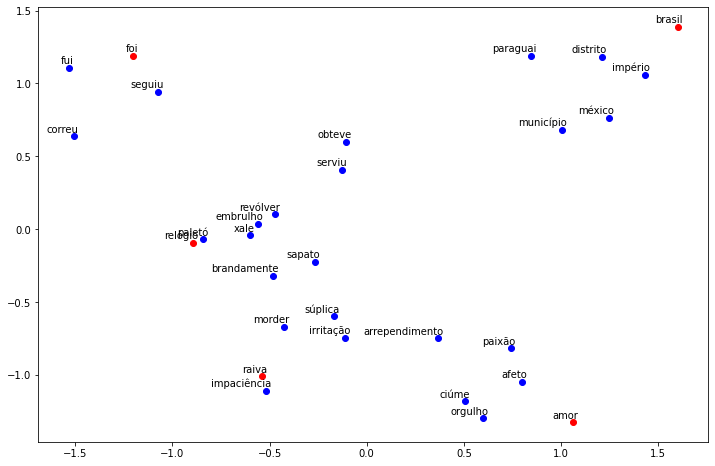

In [ ]:
plot_embedding_2d(pca_result, all_words, words_seed)

#### TSNE
<b> Uma técnica mais recente que captura estrutura não linear é o t-SNE, que significa distribuição estocástica de embedding viziznhos em t ( t-distributed Stochastic Neighbor Embedding). 
É uma ótima técnica para capturar a estrutura não linear em dados de alta dimensão(pelo menos em nível local). Isto é, dois pontos que são próximos no espaço de alta dimensão a probabilidade de estarem próximos em uma dimensão baixa é alta. </b>

Mais informações: https://medium.com/@garora039/dimensionality-reduction-using-t-sne-effectively-cabb2cd519b

<b> Atividade </b>

24) Gere a visualização dos embeddings anteriores utilizando o TSNE para reduzir a dimensionalidade.

Exemplo do TSNE:

```python
#uso de TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_result =  tsne.fit_transform(array_embeddings)
```

In [ ]:
tsne = TSNE(n_components=2, random_state=0)


In [ ]:
tsne_result =  tsne.fit_transform(array_embeddings)

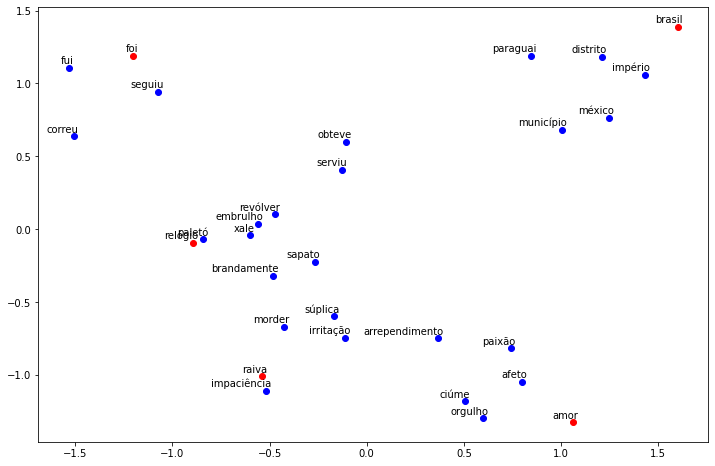

In [ ]:
plot_embedding_2d(tsne_result, all_words, words_seed)

#### UMAP

<b> Técnica super nova!! Foi lançada em 2018! Observe que o resultado do UMAP com o TSNE é semelhante. Mas existem várias vantagens do UMAP, por exemplo: é mais rápido que o t-SNE; ele captura melhor a estrutura global </b>

Mais informações: https://medium.com/@dan.allison/dimensionality-reduction-with-umap-b081837354dd

<b> Atividade </b>

25) Gere a visualização dos embeddings anteriores utilizando o UMAP para reduzir a dimensionalidade.

Exemplo do UMAP:

```python
#uso de TSNE
umap = umap.UMAP()
umap_result =  umap.fit_transform(array_embeddings)
```

In [ ]:
umap = umap.UMAP()

In [ ]:
umap_result =  umap.fit_transform(array_embeddings)

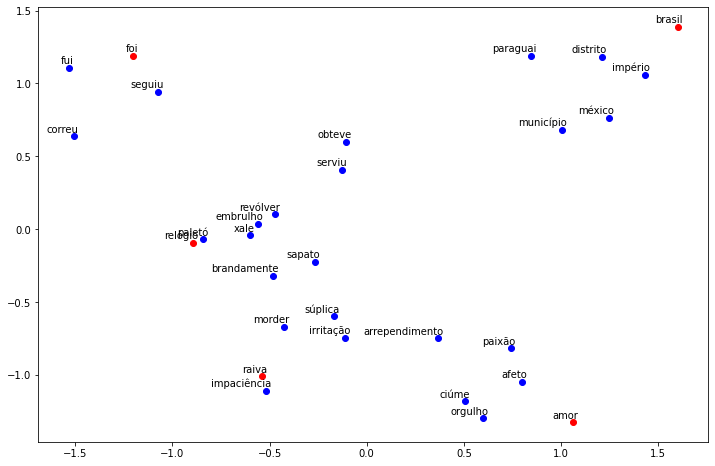

In [ ]:
plot_embedding_2d(umap_result, all_words, words_seed)